<a href="https://colab.research.google.com/github/ligemlp/mylesson/blob/master/pytorch_fashionmnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#STEP 1:initalise

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils
import torch.optim
import torchvision
import torchvision.transforms as transforms
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix
torch.set_grad_enabled(True)
torch.set_printoptions(linewidth=20)

#STEP 2:Defining model architecture
##convolutional layers has 3 paramters and linear layers has 2 paramters
- convolutional layers
 - input_channels
 - output_channels
 - kernel_size
- linear layers
 - input_features
 - output_features

In [0]:
class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1,out_channels=6,kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6,out_channels=12,kernel_size=5)

        self.fc1 = nn.Linear(in_features=12*4*4,out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)

    def forward(self, t):
        #(1)input layer
        t = t
        #(2)hidden conv layer
        t = self.conv1(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)
        #(3)hidden conv layer
        t = self.conv2(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)
        #(4)hidden linear layer
        t = t.reshape(-1, 12*4*4)
        t = self.fc1(t)
        t = F.relu(t)
        #(5)hidden linear layer
        t = self.fc2(t)
        t = F.relu(t)
        #(6)output layer
        t = self.out(t)
        #t = F.softmax(t, dim=1)
        return t

#STEP 3:Preparing data with PyTorch
1. Extract:Get the fashionmnist data
2. Transform:Put our data into **Tensor** form
3. Load:Put our data into an object and make it easy accessible

In [3]:
#Download data from torchvision
train_set = torchvision.datasets.FashionMNIST(
    root = './data/FashionMNIST',
    train=True,
    download=True,
    transform=transforms.Compose([
                                  transforms.ToTensor()
    ])
)

Extracting ./data/FashionMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/FashionMNIST/raw


Extracting ./data/FashionMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/FashionMNIST/raw


Extracting ./data/FashionMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/FashionMNIST/raw


Extracting ./data/FashionMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/FashionMNIST/raw
Processing...
Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


In [0]:
#Use PyTorch DataLoader to load data and initiating the forward class
network = Network()

train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)
batch = next(iter(train_loader))
images, labels = batch

#STEP 4:Build the model and calculate the loss

In [9]:
preds = network(images)
loss = F.cross_entropy(preds, labels)
loss.item()

def get_num_correct(preds, labels):
    return preds.argmax(dim=1).eq(labels).sum().item()

get_num_correct(preds, labels)
#Calculating the gradients
network.conv1.weight.grad
loss.backward()
network.conv1.weight.grad.shape

#Updating the weights
optimizer = torch.optim.Adam(network.parameters(), lr=0.01)
optimizer.step() #Updating the weights

preds = network(images)
loss.item()

2.2720956802368164

#STEP 5:Training on single batch
- Calculating the loss
- Calculating the gradients
- Updating the weights
- Retraining 

In [11]:
#Train use a single batch
network = Network()

train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)
optimizer = torch.optim.Adam(network.parameters(), lr=0.01)

batch = next(iter(train_loader)) #Get batch
images, labels = batch

preds = network(images)
loss = F.cross_entropy(preds, labels) #1.Calculating the loss

loss.backward() #2.Calculating the gradients
optimizer.step() #3.Updating the weights

print("loss 1:",loss.item())
preds = network(images)
loss = F.cross_entropy(preds, labels)
print("loss 2:",loss.item())


loss 1: 2.2932310104370117
loss 2: 2.2642171382904053


#STEP 6:Training with all batches( = One epoch)
- Running it in a loop instead of doing single batch-wise
- We have 60000 samples in training set, so we have 600 iterations done in one go

In [12]:
network = Network()

train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)
optimizer = torch.optim.Adam(network.parameters(), lr=0.01)

total_loss = 0
total_currect = 0

for batch in train_loader: #Get batch
    images, labels = batch
    preds = network(images) #Pass batch

    loss = F.cross_entropy(preds, labels) #Calculate the loss

    optimizer.zero_grad() #zero grad
    loss.backward() #Calculate the gradients
    optimizer.step() #Updating the weights

    total_loss += loss.item()
    total_currect += get_num_correct(preds, labels)

    print("epoch : %d \n total_loss : %f \n total_currect : %f"%(0,total_loss, total_currect))

epoch : 0 
 total_loss : 2.309778 
 total_currect : 8.000000
epoch : 0 
 total_loss : 4.612583 
 total_currect : 17.000000
epoch : 0 
 total_loss : 6.869912 
 total_currect : 34.000000
epoch : 0 
 total_loss : 9.036520 
 total_currect : 52.000000
epoch : 0 
 total_loss : 11.076833 
 total_currect : 70.000000
epoch : 0 
 total_loss : 12.904609 
 total_currect : 104.000000
epoch : 0 
 total_loss : 14.836503 
 total_currect : 136.000000
epoch : 0 
 total_loss : 16.447429 
 total_currect : 171.000000
epoch : 0 
 total_loss : 18.104078 
 total_currect : 203.000000
epoch : 0 
 total_loss : 19.546135 
 total_currect : 248.000000
epoch : 0 
 total_loss : 20.902429 
 total_currect : 293.000000
epoch : 0 
 total_loss : 22.349057 
 total_currect : 331.000000
epoch : 0 
 total_loss : 23.625191 
 total_currect : 384.000000
epoch : 0 
 total_loss : 24.840918 
 total_currect : 430.000000
epoch : 0 
 total_loss : 25.993160 
 total_currect : 481.000000
epoch : 0 
 total_loss : 26.870092 
 total_currect

#STEP 7:Training with multiple epochs for reducing errors and have better predictions

In [30]:
network = Network()

train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)
optimizer = torch.optim.Adam(network.parameters(), lr=0.01)

for epoch in range(10):
    total_loss = 0
    total_currects = 0
    for batch in train_loader:
        images, labels = batch
        preds = network(images)

        loss = F.cross_entropy(preds, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        total_currects = get_num_correct(preds, labels)
    print("epochs:%d, total_loss:%f, total_currents:%f"%(epoch,total_loss,total_currects))

epochs:0, total_loss:334.363453, total_currents:88.000000
epochs:1, total_loss:228.870022, total_currents:88.000000
epochs:2, total_loss:207.176914, total_currents:86.000000
epochs:3, total_loss:197.257420, total_currents:87.000000
epochs:4, total_loss:194.323861, total_currents:90.000000
epochs:5, total_loss:190.707216, total_currents:88.000000
epochs:6, total_loss:187.150377, total_currents:89.000000
epochs:7, total_loss:182.719214, total_currents:91.000000
epochs:8, total_loss:181.015915, total_currents:88.000000
epochs:9, total_loss:177.628858, total_currents:87.000000


#STEP 8:Create a function to get predictions for all samples

In [31]:
@torch.no_grad()
def get_all_preds(model, loader):
    all_preds = torch.tensor([])
    for batch in loader:
        images, labels = batch
        preds = model(images)
        all_preds = torch.cat((all_preds, preds), dim=0)
    return all_preds

with torch.no_grad():
    prediction_loader = torch.utils.data.DataLoader(train_set, batch_size=10000)
    train_preds = get_all_preds(network, prediction_loader)

preds_correct = get_num_correct(train_preds, train_set.targets)

print("total correct:",preds_correct)
print("accuracy:",preds_correct / len(train_set))

total correct: 52886
accuracy: 0.8814333333333333


#STEP 9:Build the confusion matrix

In [43]:
train_set.targets.shape
train_preds.argmax(dim=1)

stacked = torch.stack(
    (train_set.targets, train_preds.argmax(dim=1)),
    dim=1
)

cmt = torch.zeros(10,10,dtype=torch.int64)
cmt

stacked.shape
for p in stacked:
    tl, pl = p.tolist()
    cmt[tl, pl] = cmt[tl, pl] + 1
# cmt is the confusion matrix
cmt

tensor([[5657,    8,
           98,  114,
            9,    1,
           88,    0,
           25,    0],
        [  11, 5892,
            1,   91,
            2,    0,
            0,    1,
            2,    0],
        [ 117,    1,
         4905,   62,
          668,    0,
          200,    0,
           47,    0],
        [ 240,   27,
           28, 5464,
          177,    1,
           59,    0,
            4,    0],
        [  33,   15,
          384,  264,
         5022,    0,
          196,    0,
           86,    0],
        [   3,    0,
            2,    7,
            0, 5855,
            0,   97,
            6,   30],
        [1797,   10,
          631,  135,
          692,    0,
         2640,    0,
           95,    0],
        [   0,    0,
            0,    0,
            0,   58,
            0, 5793,
            0,  149],
        [  56,    4,
           14,   18,
           12,    7,
           10,    6,
         5864,    9],
        [   2,    0,
            0,    1,
    

#STEP 10:Plotting the confusion matrix

Confusion matrix without normalized
tensor([[5657,    8,
           98,  114,
            9,    1,
           88,    0,
           25,    0],
        [  11, 5892,
            1,   91,
            2,    0,
            0,    1,
            2,    0],
        [ 117,    1,
         4905,   62,
          668,    0,
          200,    0,
           47,    0],
        [ 240,   27,
           28, 5464,
          177,    1,
           59,    0,
            4,    0],
        [  33,   15,
          384,  264,
         5022,    0,
          196,    0,
           86,    0],
        [   3,    0,
            2,    7,
            0, 5855,
            0,   97,
            6,   30],
        [1797,   10,
          631,  135,
          692,    0,
         2640,    0,
           95,    0],
        [   0,    0,
            0,    0,
            0,   58,
            0, 5793,
            0,  149],
        [  56,    4,
           14,   18,
           12,    7,
           10,    6,
         5864,    9],
        [ 

/pytorch/aten/src/ATen/native/BinaryOps.cpp:81: UserWarning: Integer division of tensors using div or / is deprecated, and in a future release div will perform true division as in Python 3. Use true_divide or floor_divide (// in Python) instead.


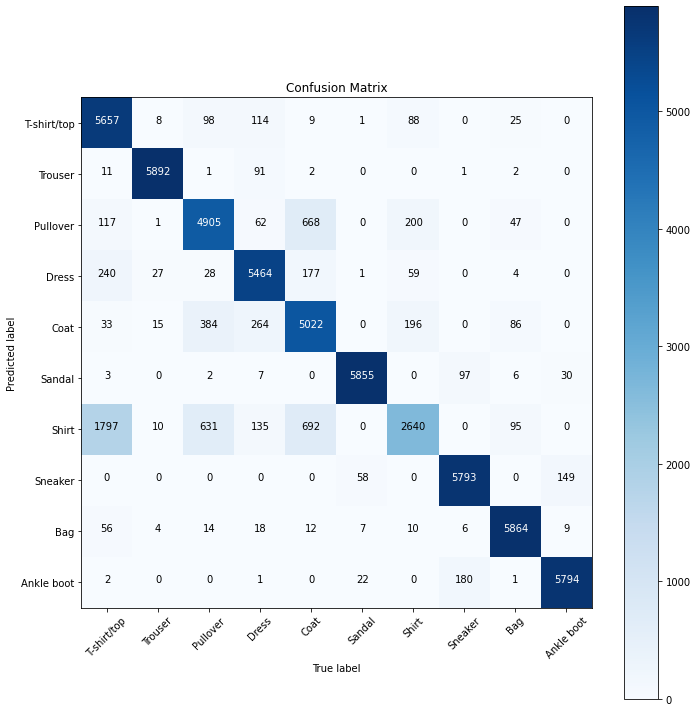

In [45]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes, normalize=False, title="Confusion Matrix", cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype("float")/cm.sum(axis=1)[:,np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix without normalized")
    
    print(cm)
    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = ".2f" if normalize else "d"
    threash = cm.max()/2
    for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j, i, format(cm[i,j],fmt),
                 horizontalalignment="center", 
                 color="white" if cm[i,j]>threash else "black")
    plt.tight_layout()
    plt.ylabel("Predicted label")
    plt.xlabel("True label")
names = (
    'T-shirt/top'
    ,'Trouser'
    ,'Pullover'
    ,'Dress'
    ,'Coat'
    ,'Sandal'
    ,'Shirt'
    ,'Sneaker'
    ,'Bag'
    ,'Ankle boot')
plt.figure(figsize=(10,10))
plot_confusion_matrix(cmt, names)